## Importing Libraries

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

pd.options.display.max_rows = 100
pd.options.display.max_columns = 30

## Loading Data Set 

### From Maven Analytics

In [2]:
customer_df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Data Cleaning
### Checking for Unique values of columns to decide what to do with each

In [4]:
unique = [feature for feature in customer_df.columns if len(customer_df[feature].unique())>0 and len(customer_df[feature].unique())<250]
for feature in unique:
  print("{} has {} unique values : {} {}".format(feature,len(customer_df[feature].unique()),customer_df[feature].unique(),"\n"))

Year_Birth has 59 unique values : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Education has 5 unique values : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Marital_Status has 8 unique values : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Kidhome has 3 unique values : [0 1 2] 

Teenhome has 3 unique values : [0 1 2] 

Recency has 100 unique values : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7] 

MntFruits has 158 unique values : [ 88   1  4

### Dropping columns

In [5]:
customer_df.drop(columns=['ID','Z_CostContact','Z_Revenue'], inplace=True)

### Checking for null values

In [6]:
customer_df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [7]:
customer_df[(customer_df['Income']== '0' )]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### Dropping rows with null values and then reseting Index of DataFrame

In [8]:
customer_df.dropna(inplace=True)

In [9]:
customer_df = customer_df.reset_index()

In [10]:
customer_df[customer_df['Income'].isnull()]

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [11]:
customer_df

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2212,2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2213,2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2214,2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


## Feature Selection/Engineering

#### Calculating the age of customers from their Year of birth

Age = []
for i in range(2216):
    Age.append(2014 - customer_df['Year_Birth'][i])

In [12]:
customer_df['Age']= 2014 - customer_df['Year_Birth']

In [13]:
customer_df

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47
2212,2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2213,2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2214,2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


#### Changing the column name to Age and dropping column called index

In [14]:
customer_df.drop(columns=['Year_Birth'], inplace=True)

### Calculating how long a customer has been a customer by using Dt_Customer
#### First converting the Dt_Customer column to an actual date

In [15]:
customer_df.Dt_Customer = pd.to_datetime(customer_df.Dt_Customer)

#### Obtaining the maximum date from the column to be used in calculations of customer length

In [16]:
max_date = customer_df.Dt_Customer.max()

In [17]:
customer_df['Dt_Customer'] = max_date - customer_df['Dt_Customer'] 

#### Extracting number of days from result with use of pandas inbuilt 'dt.days' function

In [18]:
customer_df.Dt_Customer = customer_df['Dt_Customer'].dt.days

In [19]:
type(customer_df.Dt_Customer[0])

numpy.int64

In [20]:
customer_df

,index,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,0,Graduation,Single,58138.0,0,0,971,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,1,Graduation,Single,46344.0,1,1,125,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,2,Graduation,Together,71613.0,0,0,472,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,3,Graduation,Together,26646.0,1,0,65,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,4,PhD,Married,58293.0,1,0,321,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,Graduation,Married,61223.0,0,1,541,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47
2212,2236,PhD,Together,64014.0,2,1,61,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2213,2237,Graduation,Divorced,56981.0,0,0,315,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2214,2238,Master,Together,69245.0,0,1,316,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


In [21]:
customer_df.drop(columns=['index'], inplace=True)

#### Adding Kidhome to Teenhome column then putting in a new column called children and dropping the original ones

In [22]:
customer_df["Children"] = customer_df["Kidhome"] + customer_df["Teenhome"]

In [23]:
customer_df.drop(columns=['Kidhome','Teenhome'], inplace=True)

In [24]:
customer_df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
0,Graduation,Single,58138.0,971,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,0
1,Graduation,Single,46344.0,125,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,2
2,Graduation,Together,71613.0,472,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,0
3,Graduation,Together,26646.0,65,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,1
4,PhD,Married,58293.0,321,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1
2212,PhD,Together,64014.0,61,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,3
2213,Graduation,Divorced,56981.0,315,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0
2214,Master,Together,69245.0,316,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,1


In [25]:
customer_df.dtypes

Education               object
Marital_Status          object
Income                 float64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Children                 int64
dtype: object

#### Adding all expenditure to get the Total Spending

In [26]:
customer_df['Total_spending']= customer_df.MntWines + customer_df.MntFruits + customer_df.MntMeatProducts + customer_df.MntFishProducts + customer_df.MntSweetProducts + customer_df.MntGoldProds

#### Calculating the percentage of expenditure for each item to Total spending and then dropping the columns to be replaced with the percentages

In [27]:
customer_df['%Wines'] = customer_df.MntWines / customer_df['Total_spending']
customer_df['%Meat'] = customer_df.MntMeatProducts / customer_df['Total_spending']
customer_df['%Fish'] = customer_df.MntFishProducts / customer_df['Total_spending']
customer_df['%Sweets'] = customer_df.MntSweetProducts / customer_df['Total_spending']
customer_df['%Gold'] = customer_df.MntGoldProds / customer_df['Total_spending']
customer_df['%Fruit'] = customer_df.MntFruits / customer_df['Total_spending']

In [28]:
customer_df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit
0,Graduation,Single,58138.0,971,58,635,88,546,172,88,88,3,8,10,4,...,0,0,0,0,0,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422
1,Graduation,Single,46344.0,125,38,11,1,6,2,1,6,2,1,1,2,...,0,0,0,0,0,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037
2,Graduation,Together,71613.0,472,26,426,49,127,111,21,42,1,8,2,10,...,0,0,0,0,0,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144
3,Graduation,Together,26646.0,65,26,11,4,20,10,3,5,2,2,0,4,...,0,0,0,0,0,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472
4,PhD,Married,58293.0,321,94,173,43,118,46,27,15,5,5,3,6,...,0,0,0,0,0,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,709,43,182,42,118,247,2,9,3,4,...,0,0,0,0,0,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066
2212,PhD,Together,64014.0,61,56,406,0,30,0,0,8,7,8,2,5,...,0,0,1,0,0,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000
2213,Graduation,Divorced,56981.0,315,91,908,48,217,32,12,24,1,2,3,13,...,1,0,0,0,0,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678
2214,Master,Together,69245.0,316,8,428,30,214,80,30,61,2,6,5,10,...,0,0,0,0,0,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587


In [29]:
customer_df.drop(columns=["MntWines","MntFruits","MntMeatProducts","MntFishProducts", "MntGoldProds","MntSweetProducts"], inplace=True)

#### Calculating proportion of total spending to total income for each customer 

In [30]:
customer_df['Relative_spending'] = customer_df.Total_spending/customer_df.Income

In [31]:
customer_df

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,0,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,0,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,0,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,0,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,0,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,0,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,0,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174


#### Calculating and adding to data frame a Total purchase column by adding all purchases

In [32]:
customer_df['Totalpurchases']= customer_df.NumDealsPurchases+ customer_df.NumWebPurchases+ customer_df.NumCatalogPurchases+ customer_df.NumStorePurchases

#### Calcualting customer sensitivity to price changes which is reflected in the discount purchases

In [33]:
customer_df['Price_sensitivity']= customer_df['NumDealsPurchases']/customer_df['Totalpurchases']

In [34]:
### The result has too many decimal points so we use the .round function to reduce them
customer_df['Price_sensitivity']=customer_df['Price_sensitivity'].round(4)

In [35]:
customer_df.Price_sensitivity.isna().any()

True

In [36]:
customer_df

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,0,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,0,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,0,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,0,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,0,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,0,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,0,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870


In [37]:
customer_df[customer_df.Price_sensitivity.isnull()]

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity
642,Graduation,Divorced,153924.0,157,81,0,0,0,0,0,0,0,0,0,0,0,0,39,0,6,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000039,0,NaN
968,Graduation,Divorced,4861.0,167,20,0,0,0,0,14,0,0,0,0,0,0,0,49,0,6,0.333333,0.166667,0.166667,0.000000,0.166667,0.166667,0.001234,0,NaN
1507,Graduation,Single,3502.0,602,56,0,0,0,0,14,0,0,0,0,0,0,0,41,1,5,0.400000,0.200000,0.000000,0.000000,0.200000,0.200000,0.001428,0,NaN
2109,PhD,Married,156924.0,464,85,0,0,0,0,0,0,0,0,0,0,0,0,65,0,8,0.250000,0.250000,0.125000,0.125000,0.125000,0.125000,0.000051,0,NaN


#### Calculation of customer conversion rate (web visits that actually convert to web purchases)

In [38]:
customer_df['conversion_rate']=customer_df['NumWebPurchases']/customer_df['NumWebVisitsMonth']

In [39]:
customer_df['conversion_rate'][np.isinf(customer_df['conversion_rate'])] = -1

In [40]:
(customer_df['conversion_rate'] == -1).sum()

6

#### Calculating the frequency at which a customer makes purchases 

In [41]:
customer_df.Dt_Customer.replace({0:1},inplace=True)

In [42]:
customer_df['frequency']=customer_df['Totalpurchases']/customer_df['Dt_Customer']

In [43]:
customer_df.Dt_Customer.min()

1

In [44]:
customer_df.rename(columns={"Dt_Customer": "Days_customer"}, inplace=True)

In [45]:
customer_df=customer_df.dropna()

In [46]:
customer_df

,Education,Marital_Status,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,...,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,...,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,...,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,...,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,...,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,...,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,...,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,...,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,...,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


## Exploratory Data Analysis

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

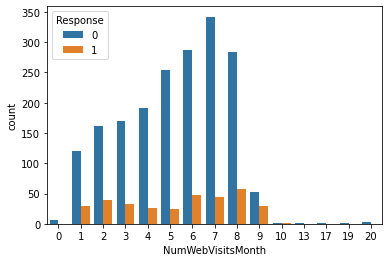

In [47]:
sns.countplot(customer_df['NumWebVisitsMonth'], hue = customer_df['Response'])

for i in customer_df.columns:
    sns.countplot(x=i, data=customer_df)
    plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

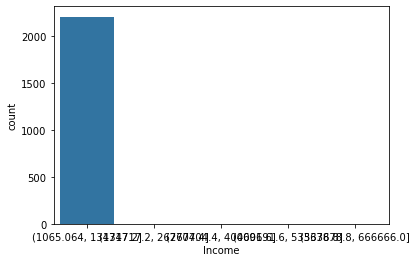

In [48]:
sns.countplot(pd.cut(customer_df['Income'], bins=5))

<AxesSubplot:ylabel='Income'>

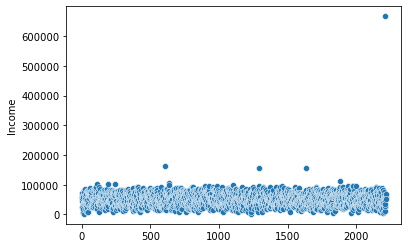

In [49]:
sns.scatterplot(data =customer_df['Income'])

In [50]:
customer_df['Income'].median()

51371.0

### Removing Outliers in the Income and Age columns that can be seen on the scatter plot

In [51]:
customer_df = customer_df.drop(customer_df[customer_df['Income']>120000].index)

In [52]:
customer_df

,Education,Marital_Status,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,...,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,...,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,...,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,...,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,...,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,...,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,...,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,...,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,...,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


In [53]:
customer_df = customer_df.drop(customer_df[customer_df['Age']>85].index)

In [54]:
customer_df

,Education,Marital_Status,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,...,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,...,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,...,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,...,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,...,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,...,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,...,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,...,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,...,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


### Correlation Heat Map

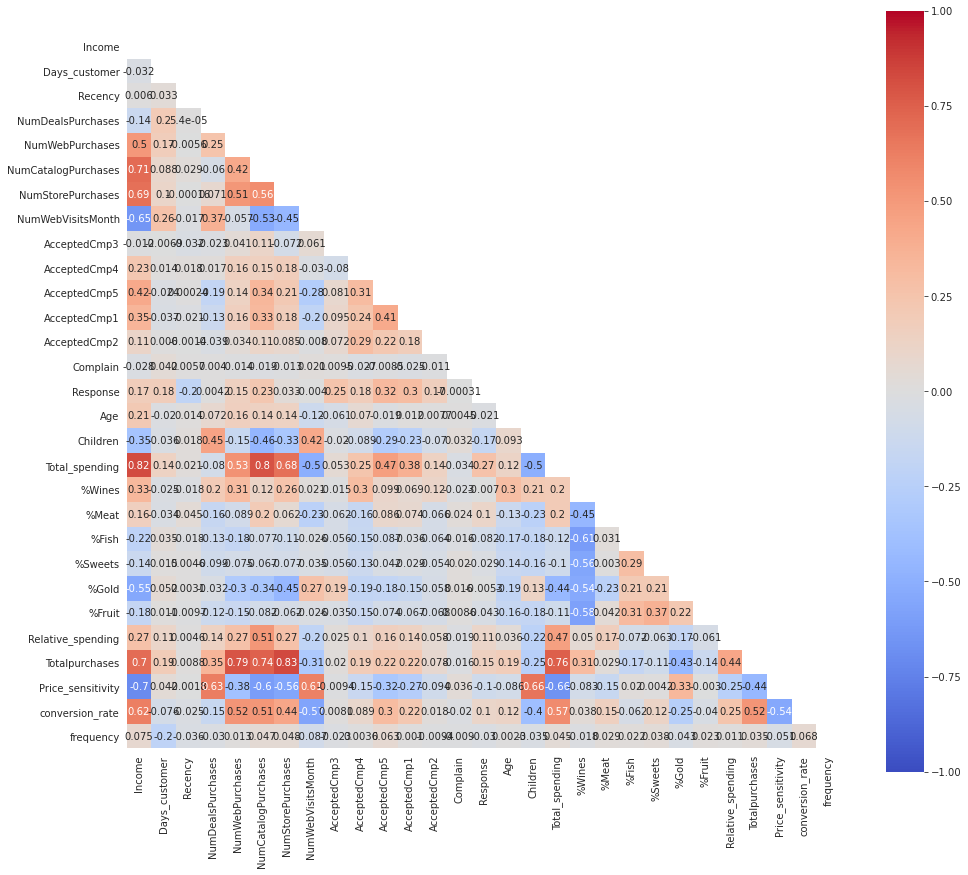

In [55]:
corr = customer_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [56]:
customer_df.describe().columns

Index(['Income', 'Days_customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Children', 'Total_spending', '%Wines', '%Meat', '%Fish', '%Sweets',
       '%Gold', '%Fruit', 'Relative_spending', 'Totalpurchases',
       'Price_sensitivity', 'conversion_rate', 'frequency'],
      dtype='object')

#### Selecting numeric columns

In [59]:
customer_df._get_numeric_data()

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,0,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,0,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,0,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,0,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,0,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,0,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,0,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


### Drooping some irrelevant columns

In [60]:
numericals = customer_df.drop(columns=['Days_customer','Marital_Status','Education','Children', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'])


In [61]:
numericals

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,58138.0,58,3,8,10,4,7,57,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,46344.0,38,2,1,1,2,5,60,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,71613.0,26,1,8,2,10,4,49,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,26646.0,26,2,2,0,4,6,30,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,58293.0,94,5,5,3,6,5,33,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,46,2,9,3,4,5,47,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,64014.0,56,7,8,2,5,7,68,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,56981.0,91,1,2,3,13,6,33,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,69245.0,8,2,6,5,10,3,58,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


<AxesSubplot:xlabel='Income', ylabel='Total_spending'>

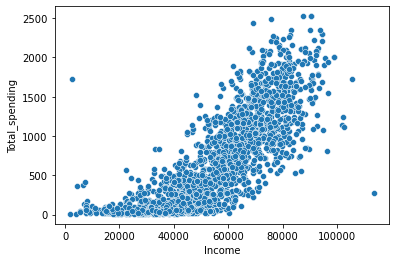

In [62]:
sns.scatterplot(x=customer_df.Income,y=customer_df.Total_spending) 

<AxesSubplot:xlabel='Relative_spending', ylabel='Income'>

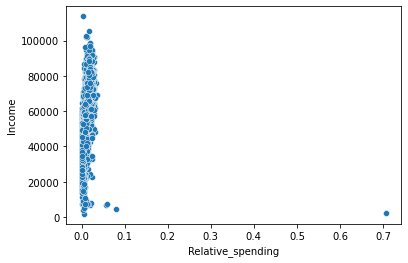

In [63]:
sns.scatterplot(x=customer_df.Relative_spending, y=customer_df.Income)

#### Dropping outliers in relative spending as seen from scatterplot

In [64]:
customer_df = customer_df.drop(customer_df[customer_df["Relative_spending"]>0.4].index)

In [65]:
customer_df

,Education,Marital_Status,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,...,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,...,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,...,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,...,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,...,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,...,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2212,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,...,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2213,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,...,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2214,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,...,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


### Heat Map for the whole dataframe

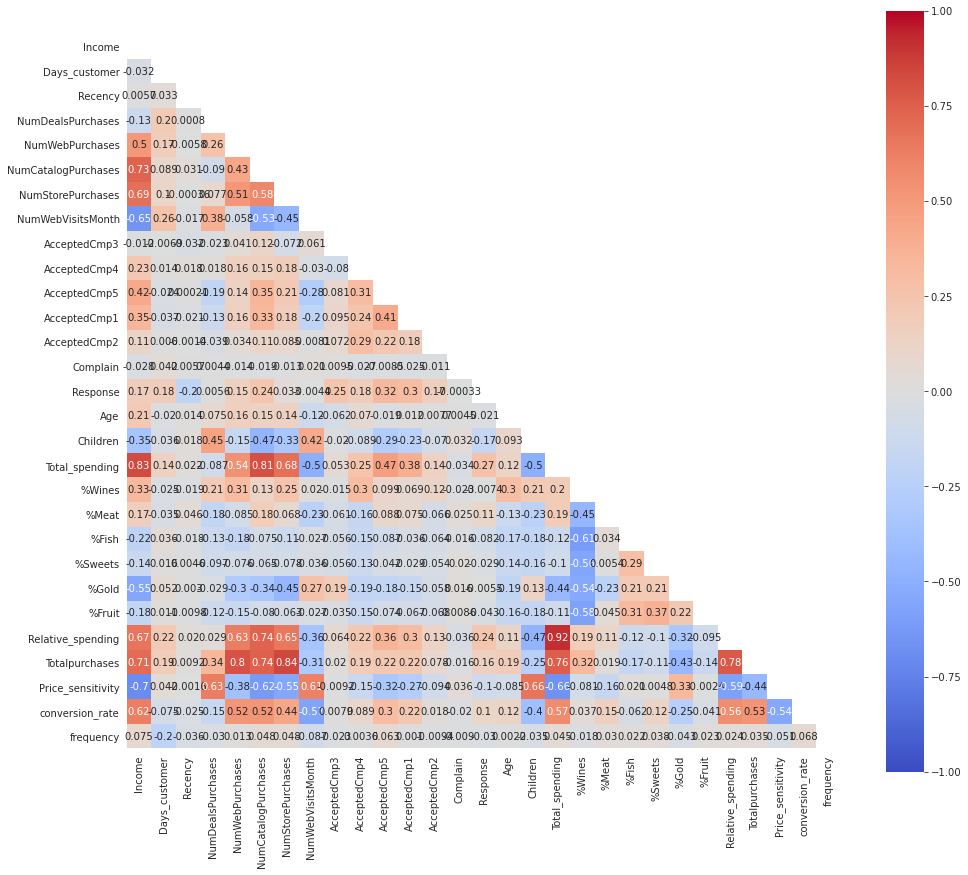

In [66]:
corr = customer_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Heat Map for the numericals Data frame

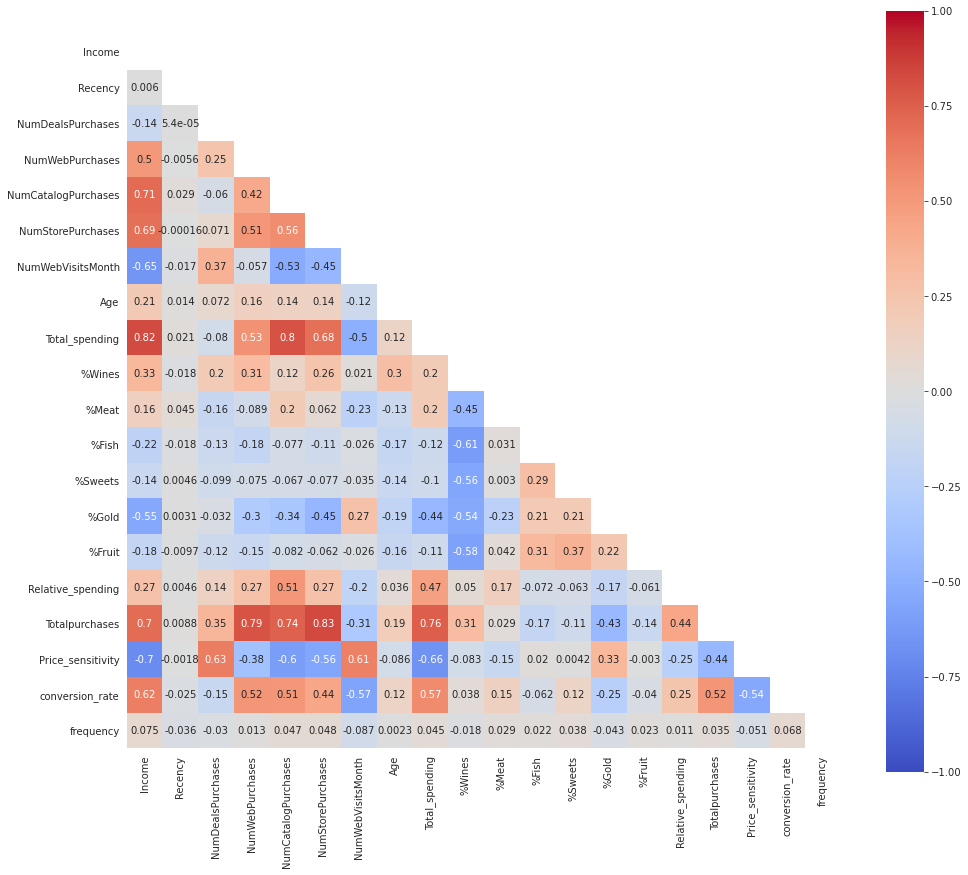

In [67]:
corr = numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [68]:
customer_df.Response.value_counts()

0    1869
1     333
Name: Response, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

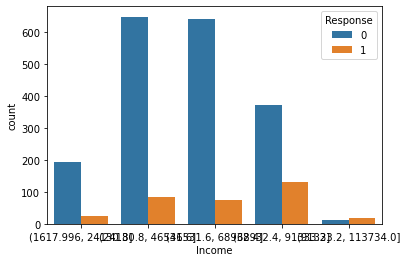

In [69]:
sns.countplot(x=pd.cut(customer_df.Income, bins=5), hue=customer_df.Response)

<AxesSubplot:xlabel='Income', ylabel='NumDealsPurchases'>

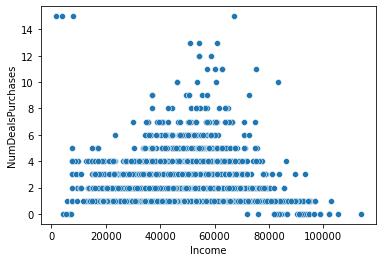

In [70]:
sns.scatterplot(x=customer_df['Income'], y = customer_df['NumDealsPurchases'] )

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

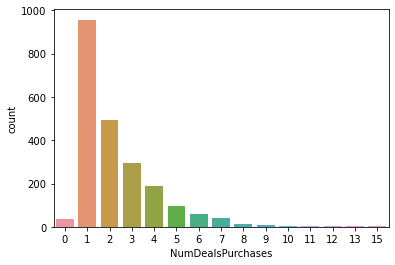

In [71]:
sns.countplot(x=customer_df['NumDealsPurchases'])

<AxesSubplot:xlabel='Education', ylabel='Income'>

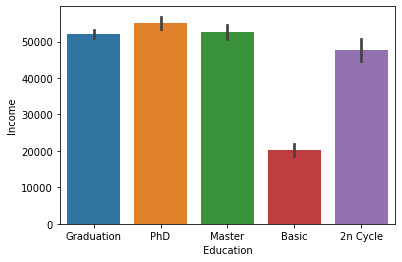

In [72]:
sns.barplot(x=(customer_df['Education']), y=customer_df['Income'])

#### Grouping Income by Education

In [73]:
customer_df.groupby('Education')['Income'].mean()

Education
2n Cycle      47625.333333
Basic         20306.259259
Graduation    52114.766667
Master        52629.579670
PhD           55220.581933
Name: Income, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

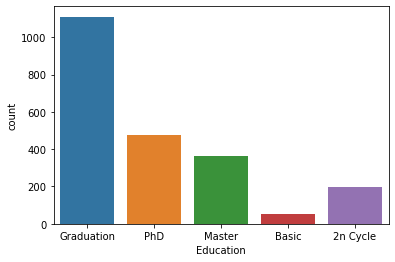

In [74]:
sns.countplot(customer_df['Education'])

### Replacing and/or renaming some unique values in some columns so they make more sense during analysis

In [75]:
customer_df['Education'] = customer_df['Education'].replace({'2n Cycle':'Master'})

In [76]:
(customer_df['Marital_Status']=='YOLO').value_counts()

False    2200
True        2
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

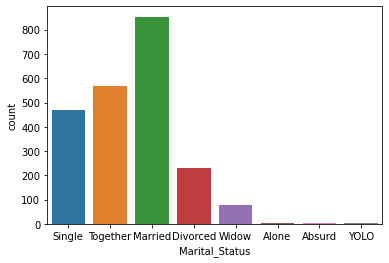

In [77]:
sns.countplot(customer_df['Marital_Status'])

In [78]:
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace({'Alone':'Single'})

In [79]:
customer_df.drop(customer_df[customer_df['Marital_Status'] == 'YOLO'].index, inplace=True)

In [80]:
customer_df.drop(customer_df[customer_df['Marital_Status'] == 'Absurd'].index, inplace=True)

In [81]:
customer_df = customer_df.reset_index()
del customer_df['index']

In [82]:
customer_df

,Education,Marital_Status,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,Graduation,Single,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,...,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,Graduation,Single,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,...,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,Graduation,Together,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,...,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,Graduation,Together,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,...,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,PhD,Married,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,...,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,Graduation,Married,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,...,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2194,PhD,Together,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,...,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2195,Graduation,Divorced,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,...,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2196,Master,Together,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,...,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


In [83]:
customer_df['Age'].max()

74

In [84]:
customer_df.groupby('Children').sum()

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
Children,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,40729702.0,321754,30591,703,2778,2942,4581,2192,48,67,135,108,18,4,167,28333,691917,246.284902,191.405624,54.496201,38.719011,57.140454,36.953807,9.663421,11004,50.0750,1170.842157,129.536193
1,52114438.0,575969,53999,2717,4750,2343,6247,6586,85,79,21,27,9,9,115,48216,525841,518.041513,248.721196,81.257608,57.997411,144.656756,57.325516,9.268356,16057,210.1247,957.906685,135.938738
2,18396324.0,204017,20424,1483,1352,453,1800,2622,29,16,3,4,3,6,47,20042,102535,217.685962,93.085600,20.075715,13.977940,56.945405,13.229379,2.000955,5088,121.5077,217.628968,34.341330
3,2333850.0,23696,2821,180,141,50,188,320,1,2,1,2,0,1,2,2560,12775,28.555713,12.019917,1.690117,1.283469,5.401065,1.049719,0.213831,559,15.0347,22.141667,5.977110


In [85]:
customer_df.NumWebVisitsMonth.isnull().sum()


0

## Modelling

### Importing Libraries for Modelling

In [86]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

### Selcting relevant numeric columns for Modelling (Kmeans Clustering)

In [87]:
numeric=customer_df._get_numeric_data()
numeric

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spending,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,58138.0,971,58,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1617,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,46344.0,125,38,2,1,1,2,5,0,0,0,0,0,0,0,60,2,27,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,71613.0,472,26,1,8,2,10,4,0,0,0,0,0,0,0,49,0,776,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,26646.0,65,26,2,2,0,4,6,0,0,0,0,0,0,0,30,1,53,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,58293.0,321,94,5,5,3,6,5,0,0,0,0,0,0,0,33,1,422,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,61223.0,541,46,2,9,3,4,5,0,0,0,0,0,0,0,47,1,1341,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2194,64014.0,61,56,7,8,2,5,7,0,0,0,1,0,0,0,68,3,444,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2195,56981.0,315,91,1,2,3,13,6,0,1,0,0,0,0,0,33,0,1241,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2196,69245.0,316,8,2,6,5,10,3,0,0,0,0,0,0,0,58,1,843,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


In [88]:
numeric=numeric.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Total_spending','Response'])
numeric

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency
0,58138.0,971,58,3,8,10,4,7,57,0,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747
1,46344.0,125,38,2,1,1,2,5,60,2,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000
2,71613.0,472,26,1,8,2,10,4,49,0,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492
3,26646.0,65,26,2,2,0,4,6,30,1,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077
4,58293.0,321,94,5,5,3,6,5,33,1,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,61223.0,541,46,2,9,3,4,5,47,1,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272
2194,64014.0,61,56,7,8,2,5,7,68,3,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656
2195,56981.0,315,91,1,2,3,13,6,33,0,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317
2196,69245.0,316,8,2,6,5,10,3,58,1,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785


### Handling Categorical Variables 
### Dummify and then concantinate to the Numericals
#### used one hot emcoding for Marital status and label encoding for Education as it has a heirarchy 

In [89]:
categoricals= customer_df.select_dtypes('object')
categoricals

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2193,Graduation,Married
2194,PhD,Together
2195,Graduation,Divorced
2196,Master,Together


#### Label encoding

In [90]:
categoricals['Education']=categoricals['Education'].replace({'Basic':1,'Graduation':2,'Master':3,'PhD':4})

#### Adding Education to the numeric after label encoding and removing from categoricals

In [91]:
numeric['Education']=categoricals['Education']

In [92]:
categoricals.drop(columns=['Education'],inplace=True)

#### Renaming some Marital statuses to ease analysis

In [93]:
categoricals['Marital_Status']=categoricals['Marital_Status'].replace({'Together':'Married','Widow':'Single'})

In [94]:
categoricals

,Marital_Status
0,Single
1,Single
2,Married
3,Married
4,Married
...,...
2193,Married
2194,Married
2195,Divorced
2196,Married


#### One Hot Encoding of categoricals

In [95]:
categoricals=pd.get_dummies(categoricals, drop_first=True)
categoricals

,Marital_Status_Married,Marital_Status_Single
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
2193,1,0
2194,1,0
2195,0,0
2196,1,0


#### Concantinating the numeric and categoricals df

In [96]:
df = pd.concat([numeric,categoricals],axis=1)

In [97]:
df

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency,Education,Marital_Status_Married,Marital_Status_Single
0,58138.0,971,58,3,8,10,4,7,57,0,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,1.142857,0.025747,2,0,1
1,46344.0,125,38,2,1,1,2,5,60,2,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,0.200000,0.048000,2,0,1
2,71613.0,472,26,1,8,2,10,4,49,0,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2.000000,0.044492,2,1,0
3,26646.0,65,26,2,2,0,4,6,30,1,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,0.333333,0.123077,2,1,0
4,58293.0,321,94,5,5,3,6,5,33,1,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,1.000000,0.059190,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,61223.0,541,46,2,9,3,4,5,47,1,0.528710,0.135720,0.031320,0.087994,0.184191,0.032066,0.021904,18,0.1111,1.800000,0.033272,2,1,0
2194,64014.0,61,56,7,8,2,5,7,68,3,0.914414,0.067568,0.000000,0.000000,0.018018,0.000000,0.006936,22,0.3182,1.142857,0.360656,4,1,0
2195,56981.0,315,91,1,2,3,13,6,33,0,0.731668,0.174859,0.025786,0.009670,0.019339,0.038678,0.021779,19,0.0526,0.333333,0.060317,2,0,0
2196,69245.0,316,8,2,6,5,10,3,58,1,0.507711,0.253855,0.094899,0.035587,0.072361,0.035587,0.012174,23,0.0870,2.000000,0.072785,3,1,0


In [99]:
customer_df.Days_customer.replace({0:1},inplace=True)

In [100]:
new_df = df

In [101]:
df = df.drop(columns=['conversion_rate','frequency'])

### Calculating and fitting the scaler to the data

In [102]:
scaler = StandardScaler()
scaler.fit(df)
customer_df_scaled = scaler.transform(df)
customer_df_scaled_df = pd.DataFrame(customer_df_scaled, columns = df.columns)
display(df.head())
print()
display(customer_df_scaled_df.head())

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,Education,Marital_Status_Married,Marital_Status_Single
0,58138.0,971,58,3,8,10,4,7,57,0,0.392703,0.337662,0.106370,0.054422,0.054422,0.054422,0.027813,25,0.1200,2,0,1
1,46344.0,125,38,2,1,1,2,5,60,2,0.407407,0.222222,0.074074,0.037037,0.222222,0.037037,0.000583,6,0.3333,2,0,1
2,71613.0,472,26,1,8,2,10,4,49,0,0.548969,0.163660,0.143041,0.027062,0.054124,0.063144,0.010836,21,0.0476,2,1,0
3,26646.0,65,26,2,2,0,4,6,30,1,0.207547,0.377358,0.188679,0.056604,0.094340,0.075472,0.001989,8,0.2500,2,1,0
4,58293.0,321,94,5,5,3,6,5,33,1,0.409953,0.279621,0.109005,0.063981,0.035545,0.101896,0.007239,19,0.2632,4,1,0


,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,Education,Marital_Status_Married,Marital_Status_Single
0,0.313072,1.975402,0.309002,0.368430,1.424187,2.685425,-0.565228,0.695911,1.015881,-1.267570,-0.294233,0.734519,0.444693,0.057021,-0.603380,0.090431,2.285739,1.333912,-0.546138,-0.788835,-1.352342,1.735209
1,-0.257942,-1.665752,-0.382317,-0.167513,-1.134792,-0.595398,-1.182708,-0.138575,1.272193,1.401126,-0.229718,-0.211789,0.030869,-0.228125,0.936440,-0.221984,-1.135590,-1.170666,1.379293,-0.788835,-1.352342,1.735209
2,0.965473,-0.172276,-0.797108,-0.703456,1.424187,-0.230862,1.287214,-0.555817,0.332382,-1.267570,0.391356,-0.691849,0.914585,-0.391739,-0.606116,0.247181,0.152682,0.806632,-1.199683,-0.788835,0.739458,-0.576300
3,-1.211634,-1.923990,-0.797108,-0.167513,-0.769224,-0.959933,-0.565228,0.278668,-1.290929,0.066778,-1.106565,1.059924,1.499371,0.092810,-0.237074,0.468712,-0.958880,-0.907026,0.627355,-0.788835,0.739458,-0.576300
4,0.320576,-0.822175,1.553374,1.440316,0.327481,0.133674,0.052253,-0.138575,-1.034616,0.066778,-0.218551,0.258730,0.478456,0.213813,-0.776603,0.943569,-0.299223,0.542992,0.746509,1.594476,0.739458,-0.576300


## Principal Component Analysis

### Importing Library for PCA

In [103]:
from sklearn.decomposition import PCA

### PCA : Trying various variations to see the largest varition percentage with the least number of features

-Standardize the range of variables
-Compute the covariance matrix to identify correlations
-Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
-Create a feature vector to decide which principal components to keep
-Recast the data along the principal components axes

In [104]:
pca = PCA(n_components = 0.85)
pca.fit(customer_df_scaled_df)
new_features = pd.DataFrame(pca.transform(customer_df_scaled_df))

print("Selected features= ",len(new_features.columns))

Selected features=  11


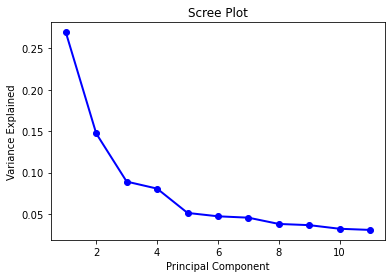

In [105]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Clustering

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

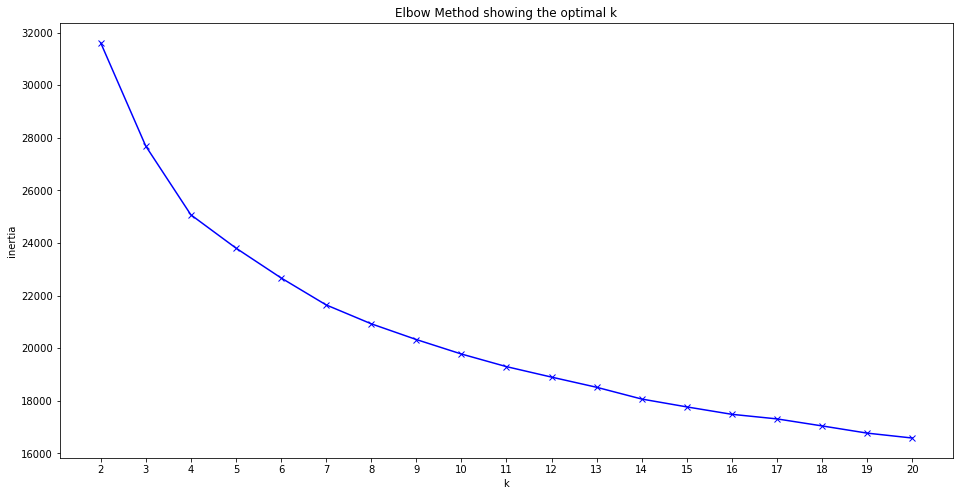

In [106]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_features)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

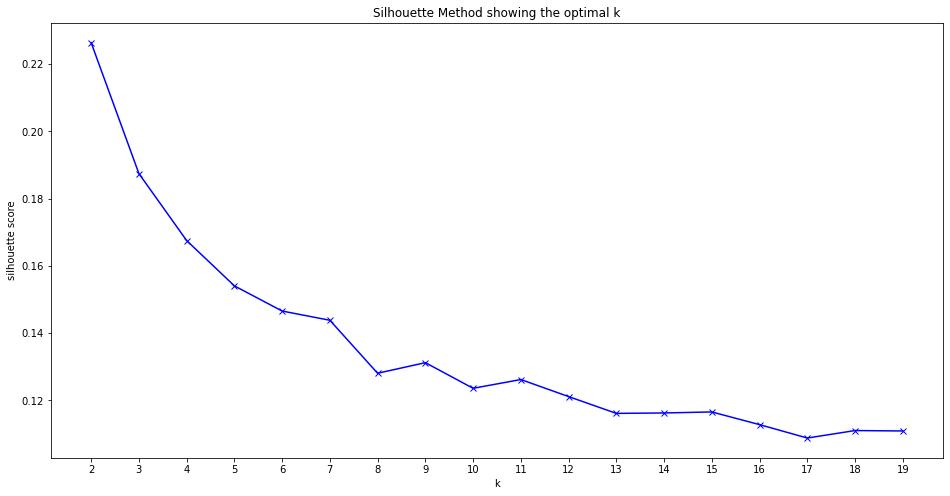

In [107]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_features)
    
    silhouette.append(silhouette_score(new_features, kmeans.predict(new_features)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [108]:
from yellowbrick.cluster import KElbowVisualizer

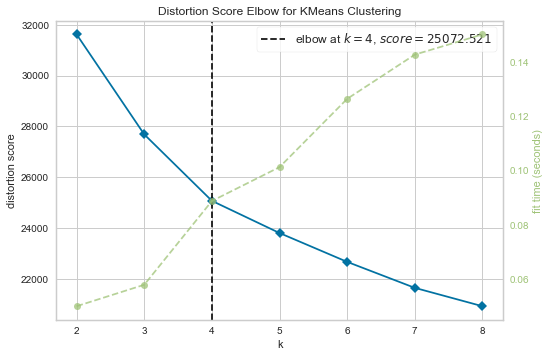

In [109]:
elbow = KElbowVisualizer(KMeans(), k=8)
elbow.fit(new_features)
elbow.show()
plt.show()

In [110]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(new_features)

KMeans(n_clusters=3, random_state=1234)

In [111]:
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 2])

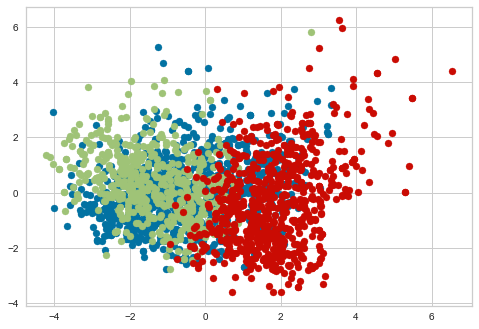

In [112]:
labels = kmeans.predict(new_features)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(new_features.to_numpy()[row_ix, 1], new_features.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [113]:
clusters = kmeans.predict(new_features)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    879
1    577
2    742
dtype: int64

In [114]:
kmeans.inertia_

27686.205967785867

In [115]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(new_features)
print(kmeans2.inertia_)

27685.31183612859


In [116]:
customer_df_scaled_df1 = customer_df_scaled_df
customer_df_scaled_df1["cluster"] = clusters
customer_df_scaled_df1

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,Education,Marital_Status_Married,Marital_Status_Single,cluster
0,0.313072,1.975402,0.309002,0.368430,1.424187,2.685425,-0.565228,0.695911,1.015881,-1.267570,-0.294233,0.734519,0.444693,0.057021,-0.603380,0.090431,2.285739,1.333912,-0.546138,-0.788835,-1.352342,1.735209,0
1,-0.257942,-1.665752,-0.382317,-0.167513,-1.134792,-0.595398,-1.182708,-0.138575,1.272193,1.401126,-0.229718,-0.211789,0.030869,-0.228125,0.936440,-0.221984,-1.135590,-1.170666,1.379293,-0.788835,-1.352342,1.735209,2
2,0.965473,-0.172276,-0.797108,-0.703456,1.424187,-0.230862,1.287214,-0.555817,0.332382,-1.267570,0.391356,-0.691849,0.914585,-0.391739,-0.606116,0.247181,0.152682,0.806632,-1.199683,-0.788835,0.739458,-0.576300,0
3,-1.211634,-1.923990,-0.797108,-0.167513,-0.769224,-0.959933,-0.565228,0.278668,-1.290929,0.066778,-1.106565,1.059924,1.499371,0.092810,-0.237074,0.468712,-0.958880,-0.907026,0.627355,-0.788835,0.739458,-0.576300,1
4,0.320576,-0.822175,1.553374,1.440316,0.327481,0.133674,0.052253,-0.138575,-1.034616,0.066778,-0.218551,0.258730,0.478456,0.213813,-0.776603,0.943569,-0.299223,0.542992,0.746509,1.594476,0.739458,-0.576300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.462434,0.124697,-0.105789,-0.167513,1.789755,0.133674,-0.565228,-0.138575,0.161507,0.066778,0.302473,-0.920886,-0.516965,0.607676,0.587446,-0.311324,1.543238,0.411173,-0.626477,-0.788835,0.739458,-0.576300,0
2194,0.597562,-1.941206,0.239870,2.512202,1.424187,-0.230862,-0.256488,0.695911,1.955692,2.735475,1.994675,-1.479555,-0.918284,-0.835609,-0.937440,-0.887564,-0.337331,0.938452,1.242987,1.594476,0.739458,-0.576300,2
2195,0.257055,-0.847999,1.449677,-0.703456,-0.769224,0.133674,2.213434,0.278668,-1.034616,-1.267570,1.192912,-0.600045,-0.587878,-0.677007,-0.925315,-0.192486,1.527615,0.542992,-1.154549,-0.788835,-1.352342,-0.576300,0
2196,0.850825,-0.843695,-1.419294,-0.167513,0.693050,0.862746,1.287214,-0.973060,1.101318,0.066778,0.210342,0.047519,0.297713,-0.251905,-0.438765,-0.248039,0.320810,1.070272,-0.844025,0.402821,0.739458,-0.576300,0


In [117]:
np.isinf(new_df).sum()

Income                    0
Days_customer             0
Recency                   0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Age                       0
Children                  0
%Wines                    0
%Meat                     0
%Fish                     0
%Sweets                   0
%Gold                     0
%Fruit                    0
Relative_spending         0
Totalpurchases            0
Price_sensitivity         0
conversion_rate           0
frequency                 0
Education                 0
Marital_Status_Married    0
Marital_Status_Single     0
dtype: int64

In [118]:
new_df['cluster']=clusters

In [119]:
new_df.NumStorePurchases.max()

13

In [120]:
new_df.groupby(['cluster']).mean()

,Income,Days_customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,%Wines,%Meat,%Fish,%Sweets,%Gold,%Fruit,Relative_spending,Totalpurchases,Price_sensitivity,conversion_rate,frequency,Education,Marital_Status_Married,Marital_Status_Single
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,71071.416382,526.357224,49.023891,1.773606,5.778157,5.187713,8.649602,3.589306,46.905575,0.461889,0.481687,0.282350,0.068950,0.051321,0.066318,0.049375,0.016974,21.389078,0.080835,1.975110,0.240763,2.699659,0.627986,0.262799
1,29273.015598,507.618718,49.376083,1.816291,1.946274,0.507799,3.065858,6.589255,38.951473,0.984402,0.208900,0.254982,0.132275,0.090310,0.225519,0.088014,0.003134,7.336222,0.241607,0.311739,0.086604,2.284229,0.655113,0.258232
2,46107.828841,498.479784,48.858491,3.336927,3.799191,1.260108,4.641509,6.419137,47.770889,1.501348,0.628882,0.202051,0.027750,0.019890,0.102056,0.019372,0.005954,13.037736,0.251052,0.609871,0.059558,2.911051,0.661725,0.226415


<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='count'>

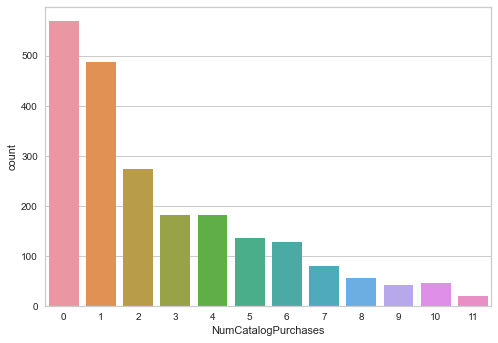

In [121]:
sns.countplot(x=df.NumCatalogPurchases)

In [122]:
new_df.cluster.value_counts()

0    879
2    742
1    577
Name: cluster, dtype: int64

In [123]:
len(clusters)

2198

## Analysis of Clusters
### To help create the personas of the each segment

In [124]:
### The percentage of each cluster

In [125]:
### We could do a group by: Cluster by evry important selected feature 
### df.groupby(['Personality'])['Income'].describe()

In [126]:
### We could do visualisations to see proportion of each feature in an every cluster to make persona description easier
### For example
 ## plt.figure(figsize = (14,8) )
 ## sns.countplot(data =df, x = 'Childrens' , hue = 'Personality' ,palette=colors_nude)
 ## plt.title('Kids Distribution' ,fontsize = 15)
 ## plt.show()

In [127]:
#df.groupby(['cluster'])['Education'].describe()

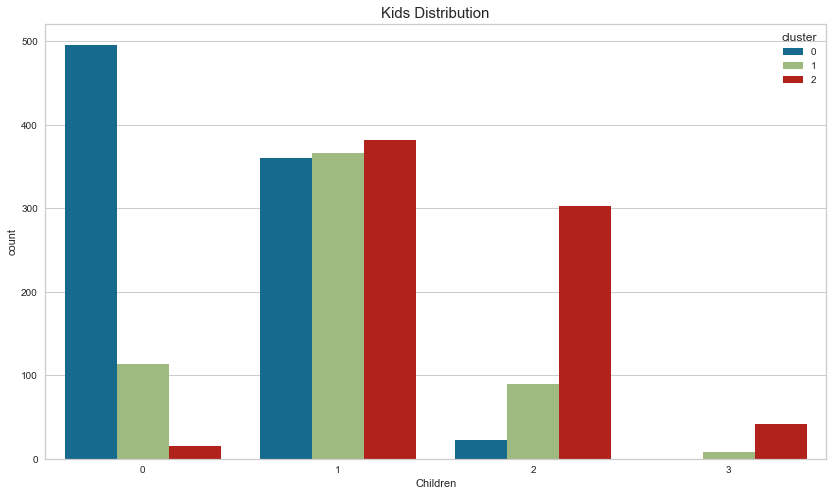

In [128]:
plt.figure(figsize = (14,8) )
sns.countplot(data =new_df, x = 'Children' , hue = 'cluster')
plt.title('Kids Distribution' ,fontsize = 15)
plt.show()

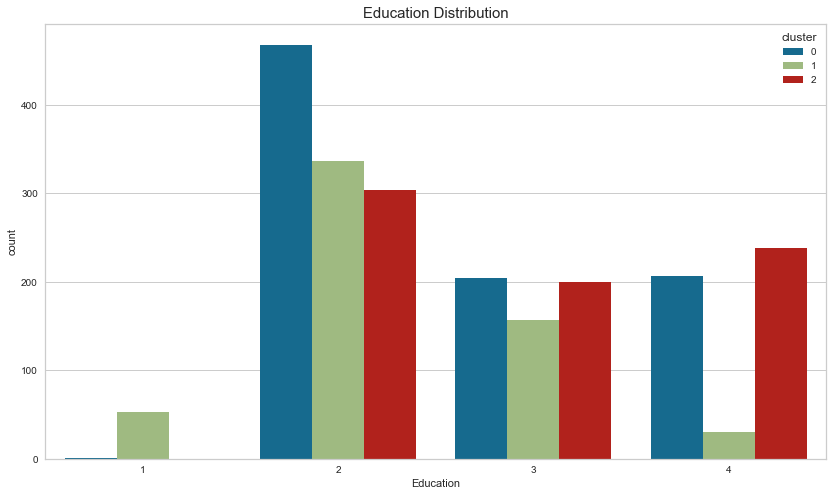

In [129]:
plt.figure(figsize = (14,8) )
sns.countplot(data =new_df, x = 'Education' , hue = 'cluster')
plt.title('Education Distribution' ,fontsize = 15)
plt.show()

In [130]:
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Marital_Status_Married' , hue = 'cluster')
plt.title('Marital Distribution' ,fontsize = 15)
plt.show()

ValueError: Could not interpret input 'cluster'

<Figure size 1008x576 with 0 Axes>

In [ ]:
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Marital_Status_Single' , hue = 'cluster')
plt.title('Marital Distribution' ,fontsize = 15)
plt.show()